# Linear Regression

## <a name="overview"></a> Overview

The two dominant types of models in supervised learning are <a href="https://en.wikipedia.org/wiki/Regression_analysis">regression</a> 
and classification modeling. In the former, the output of the model is a real value whilst for the latter it is a class index.  More generally, in regression modeling we associate an input vector $\mathbf{x} \in \mathbb{R}^N$ with a continuous variable $y\in \mathbb{R}$ whilst in classification modeling the vector $\mathbf{x}$  is associated with a $y \in \mathbb{N}$. There are various models we can use for regression modeling e.g. k-nearest neighbors or decision trees. In this section however, we restrict attention to a more humble approach and perhaps one of the most known statistical modeling approaches i.e. the <a href="https://en.wikipedia.org/wiki/Linear_regression">linear regression model</a>.  

Linear regression was the first type of regression analysis to be studied rigorously, and to be used extensively in practical applications [1]. This is because models which depend linearly on their unknown parameters are easier to fit than models which are non-linearly related to their parameters and because the statistical properties of the resulting estimators are easier to determine [1].


## <a name="sec1"></a> Linear regression

In Statistics, linear regression uses a linear model in order to represent the relationship between a scalar target 
variable  $y$ and one or more explanatory variables $x_1, \dots, x_k $ [1]. The variables $y$ and $x_i$ are also known as dependent and independent variables respectively [1]. When only one explanatory variable is used the method is also called **simple linear regression**. When  more than one explanatory variables are involved, then the process is called **multiple linear regression** [1]. We will discuss multiple linear regression in the next section. 

----

**Generalized linear models**

The linear regression model that we consider in this chapter, falls under the umbrella of <a href="https://en.wikipedia.org/wiki/Generalized_linear_model"> generalized linear models</a>. 

----

Let's assume a given data set $\mathbb{D}^{n \times m}$. Our aim is to fit a linear model within this data set. In particular, we are intersted in 
fitting models of the following form

$$y = w_0 + w_1x_1+ \dots + w_{m}x_m + \epsilon \tag{1}$$

where $\epsilon$ represents some error term with $E\left[\epsilon |\mathbb{D}^{n \times m}\right]=0$ and 
$Var\left[\epsilon |\mathbb{D}^{n \times m}\right]=\sigma^2$. Notice that we can say something about the error of the model given the data $\mathbb{D}^{n \times m}$. In this chapter we will assume that $\epsilon$ follows a normal distribution:

$$\epsilon \sim N(0, \sigma^2)$$

In this case the <a href="https://en.wikipedia.org/wiki/Maximum_likelihood_estimation">maximum likelihood estimate</a> (MLE) of $\mathbf{w}$ i.e.

$$\mathbf{\hat{w}} = argmax_{\mathbf{w}} log p(\mathbb{D}^{n \times m}|\mathbf{w})$$

coincides with the ordinary least squares estimate [4]. Where the vector  $\mathbf{w}$ stacks the coefficients $w_i$. The term $w_0$ is the bias or interception term. 
The rest of the weights represent the amount that $y$ changes when the variable associated with that specific weight changes given that the rest of the variables remain the same.

----
**Definition: Statndard Statistical Model**

The standard statistical model says that the observed value $y$ is a linear function of $x$ plus random noise [5]

$$y_i = w_0 + w_1x_i + \epsilon_i \label{eq:eq2}\tag{2}$$

where $\epsilon_i$ are independent variables with 

$$E\left[\epsilon_i\right]=0, Var\left[\epsilon_i\right]=\sigma^2$$


Notice that the standard statistical model stipulates that the errors have constant variance that does not depent on $x$.
Errors with this property are said to be **homoscedastic** [5].

----

----

**Remark**

Note that the term linear refers to the weights and not to the functional form of the features. 
Therefore, the following is also under the umbrella of the linear regression model

$$y = w_0 + w_1x_{1}^2+ \dots + w_{m}x_{m}^2 + \epsilon$$

although this is not a linear model with respect to the features.

The intercept $w_0$ represents the value of the regression function at $x = 0$. 
Sometimes $w_0$ has no physical meaning e.g. we are not particularly interested in the value of a computer with 0 RAM access. 
In other cases, this term is quite important. For example, according to the Ohm’s Law $(V = R I)$
the voltage across an ideal conductor is proportional to the current. A non-zero intercept $(V = V0 + R I)$ 
would show that the circuit is not ideal, and there is an external loss of voltage.

----

Given the assumed functional form among the independent variables, we need to estimate the weights $w_i$. This is done by fitting the model in the available data. 
We can use the least squares methodology in order to find the best fit. 

### <a name="sub_sec_1"></a> Fitting the model

Linear regression models are often fitted using the <a href="https://en.wikipedia.org/wiki/Least_squares">least squares approach</a>. 
However, they may also be fitted in other ways, such as by minimizing the _lack of fit_ in some other norm (as with least absolute deviations regression), 
or by minimizing a penalized version of the least squares cost function as in ridge regression (L2-norm penalty) and lasso (L1-norm penalty) [1]. 
We will see such approaches when discussing model overfitting. We discuss ordinary least squares in  [Chapter -@sec-leastsquares], the solution from therein is 

\begin{equation}
\mathbf{\hat{w}}_{OLS} = \left( \mathbf{X}^T \mathbf{X}\right )^{-1}\mathbf{X}^T\mathbf{y} \tag{2}
\end{equation}

For the OLS estimate we have the following theorem [5]

----
**Theorem**

Under the assumptions of the standard staistical model i.e. $E\left[\epsilon_i\right]=0$ and $Var\left[\epsilon_i\right]=\sigma^2$,
the least squares estimate $\mathbf{\hat{w}}_{OLS}$ is unbiased i.e.

$$E\left[\mathbf{\hat{w}}_{OLS}\right]=\mathbf{w}$$


----

----
**Remark**

Let's assume for a moment that we accidentally duplicate every data point, the estimate above remains unchanged.
Indeed the matrix $\mathbf{X}$ becomes

\begin{equation}
\mathbf{X} = \begin{pmatrix}
\mathbf{X} \\
\mathbf{X}
\end{pmatrix}
\end{equation}

so the expression above gives

\begin{equation}
\mathbf{\hat{w}}_{OLS} = \left(2\mathbf{X}^T\mathbf{X}\right)^{-1}2\mathbf{X}^T\mathbf{y} \label{eq:eq3}\tag{3}
\end{equation}


Thus, the estimate does not chanage. But the calculated variance matrix becomes 
\begin{equation}
\frac{\sigma^2}{2}\left(\mathbf{X}^T\mathbf{X}\right)^{−1}
\end{equation}

This is half of the correct value. Consequently the confidence intervals will shrink with a factor of $1/\sqrt{2}$.
The reason behind this  is that the calculation assumes that the data is i.i.d. which is not true; the pair of doubled values obviously have a correlation equal to 1.0. Similarly, the value of the coefficient of determination remains the unchanged.


---

### Example 1

Let's see an example using ```scikit-learn```.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

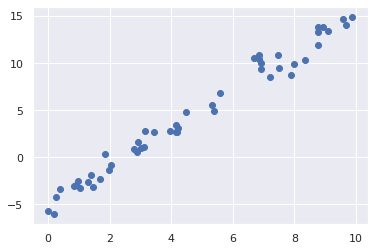

In [6]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

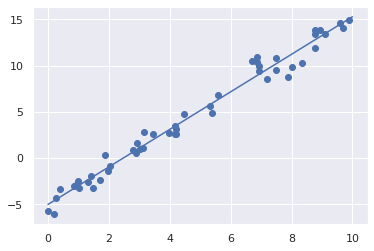

In [11]:

model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 50)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [15]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0272088103606953
Model intercept: -4.998577085553204


The coefficient of determination, see section **Evaluating the model**, is  

In [14]:

print("Model r^2={0}".format(r2_score(y, yfit)))

Model r^2=-0.58735989521677


Let's verify that the loss function is indeed quadratic. We do so without accounting for the bias term.

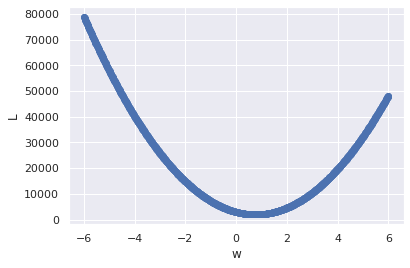

In [19]:
intersepts = np.linspace(-6.0, 6.0, 1000)
loss = []
for w in intersepts:
    yfit = w * xfit
    loss.append(sum((y - yfit)**2))  
plt.scatter(intersepts, loss)  
plt.xlabel('w')  
plt.ylabel('L')  
plt.show()

### <a name="subsec3"></a> Evaluating the model

Now that we fitted the model in the data we want to know how good the fit is. 
In other words, we need some way(s) to assess the goodness of fit of the model to the presented data. 
One such metric, is the <a herf="https://en.wikipedia.org/wiki/Coefficient_of_determination">**coefficient of determination**</a> $r^2$ [3]. 

The coefficient of determination indicates the percent of variance in $y$ that is explained or accounted for by the independent variable $x$. For linear regression involving just one predictor or independent variable, the coefficient of determination $r^2$ is just the Pearson correlation coefficient between $y$ and $x$ [3] i.e.

$$r^2 = (\rho(y,x))^2 \tag{3}$$

The value of $r^2$ ranges between 0 and 1. A value of $r^2=0$ means that there is no fit at all between the model and the data, i.e. that no percentage of the variance in $y$ is explained by $x$. This means that knowing $x$, and using a linear model, tells us nothing about $y$ [3]. A value of $r^2=1$ means a perfect fit of the model and the data and $100\%$ of the variance in $y$ is explained by $x$ or if we know $x$ then we fully know $y$.

----

**Remark**

The coefficient of determination belongs to a family of statistics called variance accounted for indices. Other notable members of this family are the $R^2$ coefficient for multiple regression and the $\eta^2$ coefficient from ANOVA [3]. When we see any member of this family, we should think **percent improvement in predictive accuracy** [3].


----

We are also interested in the expected value, the variance as well as  confidence intervals for the obtained least squares estimates. These are given below, see also [4],

\begin{equation}
E\left[\hat{\mathbf{w}}_{OLS}| \mathbb{D}^{n \times m} \right] = \mathbf{w} \label{eq:eq4}\tag{4}
\end{equation}

i.e. $\hat{\mathbf{w}}_{OLS}$ is an unbiased estimate of $\mathbf{w}$. The variance of the estimate is [4]

\begin{equation}
Var\left[\hat{\mathbf{w}}_{OLS}| \mathbb{D}^{n \times m}\right] = \frac{\sigma^2}{Ns^{2}_{X}} \begin{pmatrix} \frac{1}{N}\sum x_{i}^2 & -\bar{x} \\
-\bar{x} & 1\end{pmatrix} \label{eq:eq5}\tag{5}
\end{equation}

### <a name="subsec3"></a> Model assumptions

Mathematical models, being simplifications of phenomena, make certain assumptions and linear regression is not an exception. In this subsection we want to go over these assumptions. The assumptions below are taken from [3] and they should be met whenever we want to use bivariate regression for modeling purposes. These are

- Linearity
- Independence
- Homogeneity of variance
- Normality
- Bivariate normality

Let's briefly explain what each of these assumptions means in practice. Linearity means that $y$ should be a linear function of $x$ or at least a linear model is a good approximation of their dependence. Pearson's coefficient $\rho$ and a scatter plot can tells us quantitatively and qualitatively whether this is the case or not. Independence, means that each observation $x_i$ should be drawn independently from the population of interest. For example, the researcher should take repeated measures on the same variable from the same participant [3].  Homogeneity of variance (or homoscedasticity) means that the variance of the dependent variable $Y$ should remain fairly constant at all values of $X$. The normality assumption refers to how the residuals are distributed. Specifically, these should be normally distributed [3]. However, violation of this assumption is only serious with relatively small samples. The final assumption is bivariate normality assumption.  This refers to the fact that any specific score on one of the variables, scores on the other variable should follow the normal distribution.

### Correlation and regression

## <a name="sec2"></a> Summary

In this section, we reviewed the linear regression model. The inferences from linear regression are most accurate when the residuals behave like random normal numbers [4].


Least squares are not robust against outliers which can have a large effect on the estimated coefficients and their standard errors.

## <a name="refs"></a> References

1. <a href="https://en.wikipedia.org/wiki/Linear_regression">Linear regression model</a> 
2. Kevin P. Murphy, _Machine Learning A Probabilistic Perspective_, The MIT Press.
3. Larry Hatcher, _Advanced statistics in research_, Shadow Finch Media.
4. Larry Wasserman, _All of Statistics: A concise course in statistical inference_, Springer.
5. John A. Rice, _Mathematical Statistics and Data Analysis_, Duxbury Press, 2nd Edition.